# Data Preprocess (MNIST)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

%matplotlib inline

# 데이터 불러오기
TensorFlow에서 제공해주는 데이터셋(MNIST) 예제 불러오기 

In [2]:
from tensorflow.keras import datasets

- 데이터 shape 확인하기

In [14]:
mnist = datasets.mnist

In [15]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

In [16]:
train_x.shape

(60000, 28, 28)

# Image Dataset 들여다보기

불러온 데이터셋에서 이미지 데이터 하나만 뽑아서 시각화까지 확인

- 데이터 하나만 뽑기

In [17]:
sample = train_x[0]
sample.shape

(28, 28)

- 시각화해서 확인

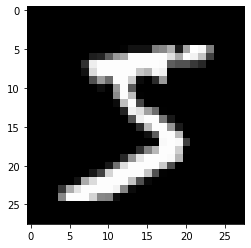

In [18]:
plt.imshow(sample, 'gray')
plt.show()

# Channel 관련

[Batch Size, Height, Width, Channel]  
GrayScale이면 1, RGB이면 3으로 만들어줘야함

- 다시 shape로 데이터 확인

In [19]:
train_x.shape

(60000, 28, 28)

- 데이터 차원수 늘리기 (numpy)

In [20]:
x_train = np.expand_dims(train_x, -1)
x_train.shape

(60000, 28, 28, 1)

- TensorFlow 패키지 불러와 데이터 차원수 늘리기 (tensorflow)

In [21]:
new_x_train = tf.expand_dims(train_x, -1)
new_x_train.shape

TensorShape([60000, 28, 28, 1])

- TensorFlow 공홈에서 가져온 방법 tf.newaxis

In [23]:
train_x[..., tf.newaxis].shape

(60000, 28, 28, 1)

In [27]:
reshape = train_x.reshape([60000,28,28,1])
reshape.shape

(60000, 28, 28, 1)

*주의 사항  
matplotlib로 이미지 시각화 할 때는 gray scale의 이미지는 3번쨰 dimension이 없으므로,  
2개의 dimension으로 gray scale로 차원 조절해서 넣어줘야함

- new_train_x[0] -> new_train_x[0, :, :, 0]

In [35]:
new_train_x = train_x[...,tf.newaxis]
new_train_x.shape

(60000, 28, 28, 1)

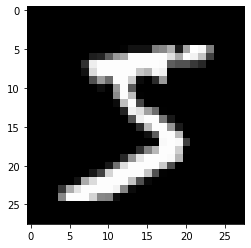

In [36]:
disp = new_train_x[0]
plt.imshow(disp, 'gray')
plt.show()

In [37]:
disp.shape

(28, 28, 1)

- 다시 시각화

In [38]:
disp = np.squeeze(new_train_x[0])
disp.shape

(28, 28)

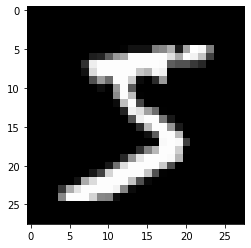

In [39]:
plt.imshow(disp, 'gray')
plt.show()

# Label Dataset 들여다보기  

Label 하나를 열어서 Image와 비교하여 제대로 들어갔는지. 어떤 식으로 저장 되어있는지 확인

- label 하나만 뽑아보기

In [40]:
train_y.shape

(60000,)

In [41]:
train_y[0]

5

- Label 시각화 

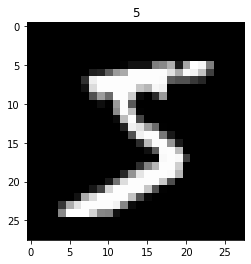

In [43]:
plt.title(train_y[0])
plt.imshow(train_x[0], 'gray')
plt.show()

# OneHot Encoding



컴퓨터가 이해할 수 있는 형태로 변환해서 Label을 주도록 함

- 5 : [0,0,0,0,0,1,0,0,0,0]

- 9 : [0,0,0,0,0,0,0,0,0,1]

- tensorflow.keras.utils.to_categorical

In [44]:
from tensorflow.keras.utils import to_categorical

- 1을 예시로 one hot encoding

In [45]:
to_categorical(1,10)

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

- label 확인해서 to_categorical 사용

In [46]:
label = train_y[0]
label

5

In [48]:
label_onehot = to_categorical(label, num_classes=10)
label_onehot

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

- onehot encoding으로 바꾼 것과 이미지 확인

C:\Users\jumin\anaconda3\envs\fastcampus\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


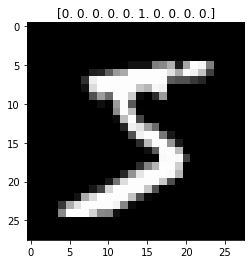

In [49]:
plt.title(label_onehot)
plt.imshow(train_x[0], 'gray')
plt.show()